In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ERROR: Error in parse(text = x, srcfile = src): <text>:5:8: unexpected symbol
4: 
5: import numpy
          ^


**Scenario: **

-I’m a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. I’ve been asked to study and analyze FitBit data of 30 different test subjects to gain insights on how people use smart watches. This analysis will be used to help leverage the company. 

**Ask  **

Sršen asked me to analyze smart device usage data in order to gain insights on how consumers use non-Bellabeat smart devices. She then wants me to select one Bellabeat product to apply these insights to. 

 
1a. Task 

Study the activity levels to find trends in how people use their health trackers to provide insights for BellaBeat to improve their app.  

1b. Impact of Analysis 

Gaining insights on how smart device users use their devices will leverage Bellabeat’s products to help them focus their attention on what the majority of the population uses smart devices for. There’s an extremely strong chance that people will use Bellabeat products the same way that they used their other products and that first time smart device users will use them the same way.  

1c. Stakeholders 

1c.1- Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer 

1c.2- Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team  

1c.3- Analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. 

 

1d. Business Task 

Find the primary ways in which people use smart devices to enhance user experience with Bellabeat products. 

 

**Prepare **

2a. Data Set 

FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. 

2b. The data is organized with all 30 entries of each participant stacked on top of each other. The data is separated in various columns and rows.  

2c. It's in a long format. The data of each of the participants are stacked instead of next to each other.  

2d.  Are there issues with bias or credibility in this data? 

- The data is quite outdated, but can still be used to gain insights that can still be used.  

2e.  Does your data ROCCC?  

2e.1. The data is reliable and original, for it has been collected by various people who use smart devices and the participants didn’t have any reason to change the way they use their devices for the study.  

2e.2. The data technically isn't current, but can still be used to gain insights on how people use smart devices.  

2e.3. This data set was compiled by Bellabeat to gain insights to help improve their products. That being said, it’s safe to say that the data is credible.  

2f. How did you verify the data’s integrity?  

2f.1. I formatted the data as a table, which made the first rows have drop downs. 

2f.2. I verified that the IDs all had the same number of digits and that there were only 33 IDs.  

2f.3. I used the error checker and checked for any null values, using conditional formatting and utilizing the drop downs to show if any rows had null values.  

2g. Are there any problems with the data? 

- There are superfluous columns that only take up space. I will remove them and not include them in the analysis, for there isn’t enough data to draw any conclusions from them.  

 

**Process **

3A. Tools of Choice. 

I will use Excel to clean the data, for excel has many handy tools that make data cleaning both easier and thorough. 

3B. Data Integrity and Cleanliness 

The data source’s integrity is in check, for this is the provided data sets for the case study. The following is the process that I took to cleaning the data in excel:  

3B.1. I made the data set into a table to see if there were any issues with the drop-down options for each column. 

3B.2. I used the data error checker to check for any obvious errors.  

3B.3. I deleted the SedentaryActiveDistance and loggedactivity columns, for they don’t have enough data to analyze to come up with a proper and accurate analysis.  

3B.4. I used Conditional formatting to check for any null values by having them highlighted in red. No null values were found.  

3B.5. I verified that the dates used the same formatting.  

3B.6. I converted each of the distance columns to show only 2 decimal places.  

3B.7. In the Sleep Data dataset, I reformatted the dates in the SleepDay column to match the format in the BellaBeat Dataset.  

3B.8. I made the Sleep Data dataset into a table and checked for errors using the column drop downs.  

3B.9. I uploaded the CSV files into Rstudio.  

**Analyze **

4A. Using R Studio, I analyzed the activity data to find out how the test subjects used their activity tracker.  

4A.1. I wanted to calculate the total amount of activity time for each of the test subjects, so I used the following: 

In [ ]:
 Activities <- Activities %>% 
  mutate(TotalActiveMinutes =  
           LightlyActiveMinutes + FairlyActiveMinutes + VeryActiveMinutes) 

4b. I would like to separate the users by how active they are. I will base this on the amount of steps taken per day. According to 10000steps.org, activity levels can be broken down by the amount of steps taken per day.

Under 5,000 steps = Sedentary 

5,000- 7,500 steps = Low Active 

7,500 – 10,000 steps = Somewhat Active 

10,000 – 12,500 steps = Active 

12,500 and more = Highly Active 

4b.1. To separate the users by activity level, I will use the following:

In [ ]:
Activities <- within(Activities, {ActivityLevel <- NA 

ActivityLevel [TotalSteps < 5000] <- "Sedentary" 

ActivityLevel [TotalSteps > 5000 & TotalSteps < 7500] <-"Low Active" 

ActivityLevel [TotalSteps > 7500 & TotalSteps < 10000] <- "Somewhat Active" 

ActivityLevel [TotalSteps > 10000 & TotalSteps < 12500] <- "Active" 

ActivityLevel [TotalSteps >= 12500] <- "Highly Active"}) 

  

Activities$ActivityLevel <-  

  factor(Activities$ActivityLevel,  

         levels = c("Sedentary", "Low Active", "Somewhat Active", "Active", "Highly Active")) 

4c. I separated the date and time in both data frames so they would be formatted the same. I used the following: 

In [ ]:
SleepDataSet <- separate(data.frame(SleepDataSet), SleepDay, into = c('Date', 'Time'), sep = ' ') 

 

Activities <- rename(Activities, Date = ActivityDate) 

4d. I merged the two data frames by using the following: 

In [ ]:
Act_Sleep <- merge(Activities, SleepDataSet, by = c("Id", "Date")) 

4e. I wanted the amount of time that each person was asleep to be displayed in hours, so I used the following: 

In [ ]:
Act_Sleep <- Act_Sleep %>% 

  mutate(Hours_Asleep = round(TotalMinutesAsleep / 60, digits = 2)) 

4f. I wanted to label the different amounts of sleep with a phrase that shows how much sleep they received, so I used the following: 

In [ ]:
Act_Sleep <- within(Act_Sleep, { 

  sleepHours <- NA 

  sleepHours[Hours_Asleep < 7.00] <- "Not enough Sleep" 

  sleepHours[Hours_Asleep >= 7.00 &  

               Hours_Asleep < 9.00] <- "Optimal Amount of Sleep" 

  sleepHours[Hours_Asleep >= 9.00] <- "Too much Sleep"}) 

**Share **

5a. Using GGPLOT2, I created a bar graph that shows which kind of users were involved in this study.  

In [ ]:
ggplot(data = Act_Sleep, aes(x = ActivityLevel, fill = ActivityLevel)) + 

  geom_bar() + labs(title = "User Activity Level",  

                    x = "Activity Level", fill = "Activity Level") 

![](http://)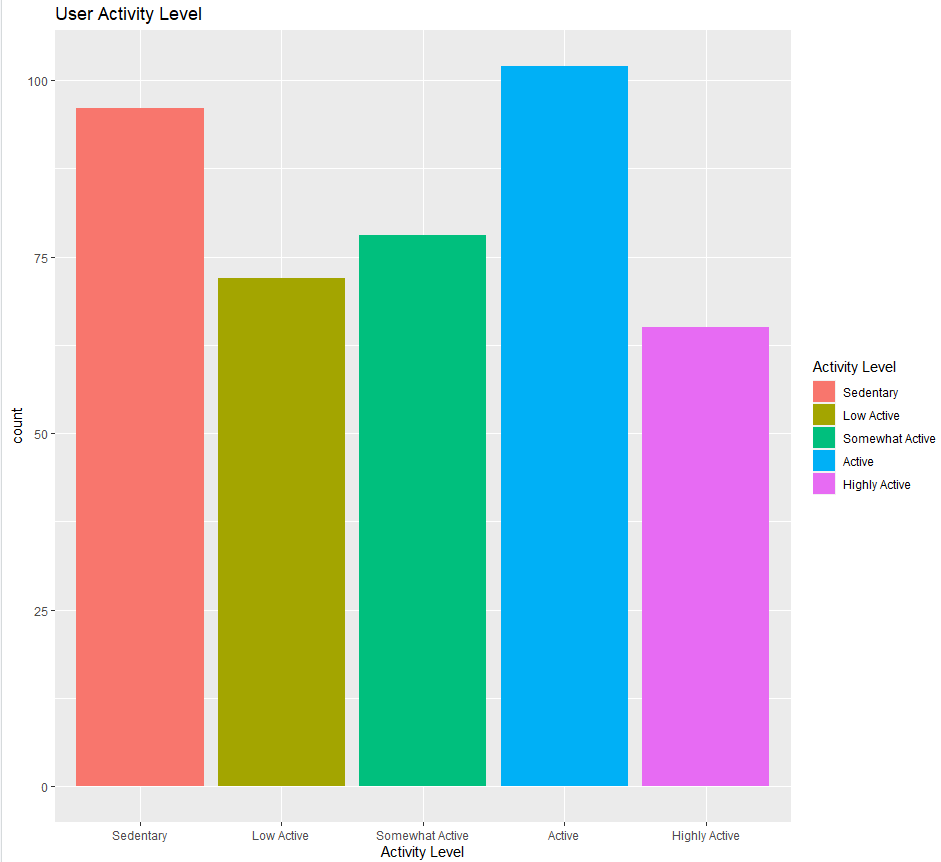

5b. I created a box chart to compare the amount of sleep the test subjects were receiving compared to the amount of activity they received. I used the following:  

In [ ]:
ggplot(data = Act_Sleep) + 
geom_boxplot(mapping = aes(x=sleepHours, y=Calories, fill=sleepHours)) + 
labs(title = "Sleep vs Level of Activity", x = "Amount of Sleep") + 
theme(legend.position = "none") 

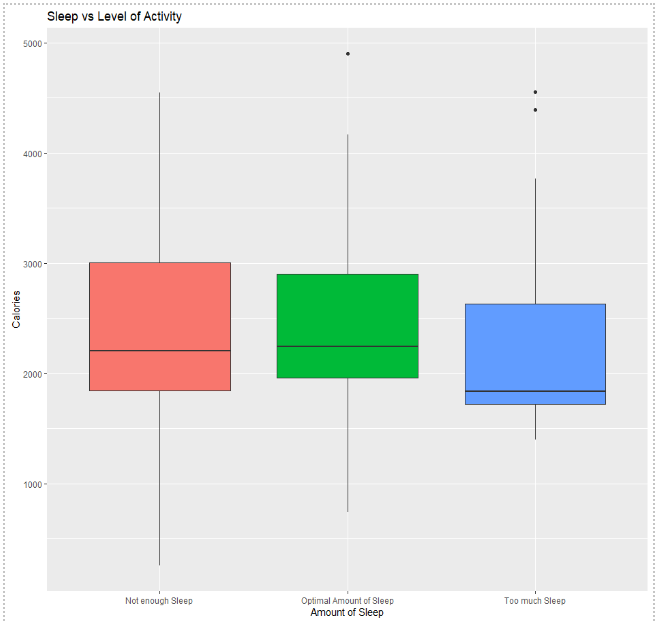

5c. I created a scatterplot to show how staying sedentary greatly effects quality of sleep by using the following:  

In [ ]:
ggplot(data = Act_Sleep) +  

  geom_point(mapping = aes(x = Hours_Asleep, y = SedentaryMinutes, color = sleepHours)) + 

  geom_smooth(mapping = aes(x = Hours_Asleep, y = SedentaryMinutes)) +  

  labs(title = "Time Active vs Time Sedentary", x="Time Asleep", y="Time Sedentary") 

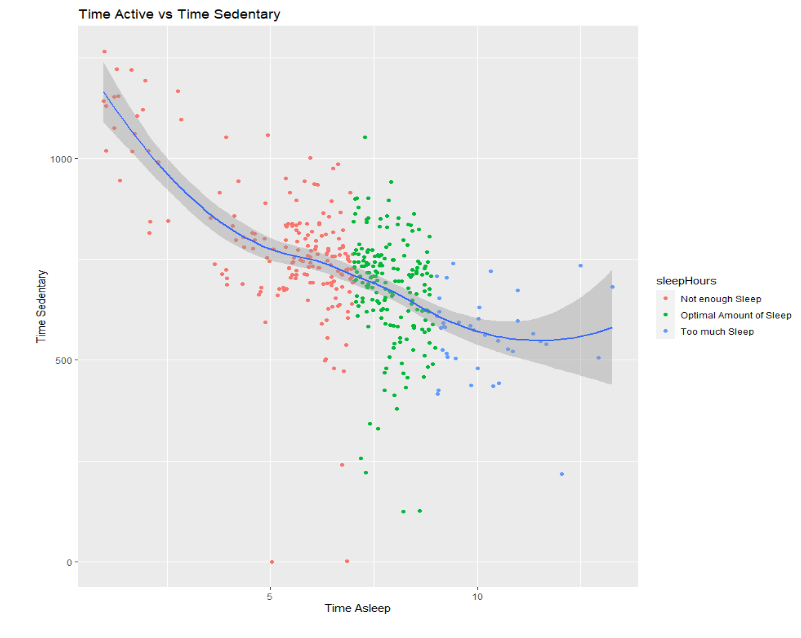

**ACT** 

Key Findings: 

1. Most of the users didn’t get enough sleep and were less than active.  

2. Users that got too much sleep were less likely to be active.  


Conclusion: 

I’ve come to the conclusion that Bellabeat could potentially benefit by promoting the benefits of receiving a goodnight’s rest through minimizing the amount of time spent sedentary and maximizing active time, for this analysis shows that people who are active will have better sleep and be healthier overall. This analysis also shows that many people who are active don’t receive enough sleep, so bellebeat should promote healthy levels of sleep.  